batch_count: 938
img_shape: torch.Size([64, 1, 28, 28]) res_shape: torch.Size([64])


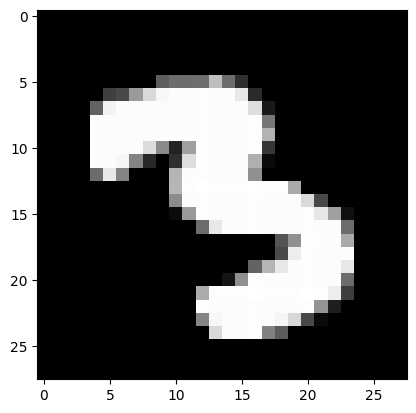

res: 3


In [122]:
import numpy as np
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def get_data_loader(is_train):
    # 使用手写数字数据集 若是没有就下载到本地，有就直接使用
    data_set = MNIST("./",is_train, transform=transforms.ToTensor(), download=True)
    return DataLoader(data_set, batch_size=64, shuffle=True)

train_data = get_data_loader(is_train=True)
test_data = get_data_loader(is_train=False)
print('batch_count:',len(train_data))
img,res = next(iter(train_data))
print('img_shape:',img.shape,'res_shape:',res.shape)
plt.imshow(img[0][0],cmap='gray')
plt.show()
print('res:',res[0].item())

net: Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
) parameter_count: 59210


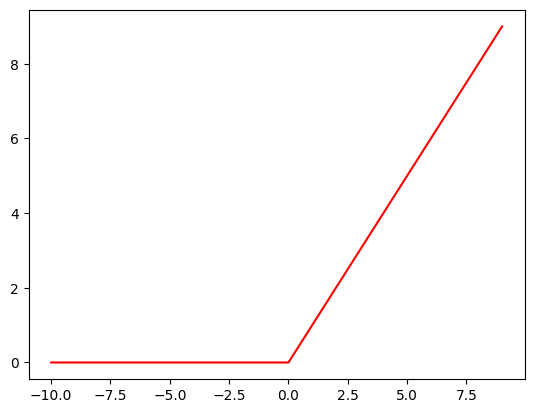

In [123]:
from torch.nn import Module,Linear
import torch.nn.functional as F
import torch

class Net(Module):
    def __init__(self):
        super().__init__()
        self.fc1 = Linear(28*28, 64) # 图片大小
        # 层数越多参数越多
        self.fc2 = Linear(64, 64) # y = xA + b   通过矩阵 A 转换纬度，b 表示偏移
        self.fc3 = Linear(64, 64)
        self.fc4 = Linear(64, 10) # 输出 10个数的概率
    def forward(self, item):
        item = F.relu(self.fc1(item)) # 线性层与非线性层组合处理  多层全连接
        item = F.relu(self.fc2(item))
        item = F.relu(self.fc3(item))
        return F.softmax(self.fc4(item), dim=1) # 转换为 10个数并规范成概率

net = Net()
print('net:',net,'parameter_count:',sum(item.numel() for item in net.parameters()))
# linear = Linear(64, 10)
# print('weight_shape:',linear.weight.shape,'bias_shape:',linear.bias.shape)
x=torch.arange(-10,10)
y = F.relu(x)
plt.plot(x,y, color='red')
plt.show()
# temp = torch.rand([5])
# prob = F.softmax(temp,dim=0)
# print('temp:',temp)
# print('prob:',prob,'sum:',prob.sum().item())

In [124]:
def evaluate(datas, net):
    correct = 0
    total = 0
    with torch.no_grad():  # 测试不需要计算梯度
        for (imgs, res) in datas:
            outputs = net.forward(imgs.view(-1, 28*28))
            for i, temp in enumerate(outputs):
                if torch.argmax(temp) == res[i]:
                    correct += 1
                total += 1
    return correct / total

# temp = torch.rand([2,10,10])
# view = temp.view(-1,5)
# print('temp_shape:',temp.shape,'view_shape:',view.shape)
# temp = torch.rand([5]) # argmax 返回最大值的下标
# print('temp:',temp,'argmax:',torch.argmax(temp).item())

In [125]:
from torch.optim import Adam

opti = Adam(net.parameters(), lr=0.001) # 自动优化器
epoch = 3
print('parameter_count:',sum(item.numel() for item in net.parameters()))
print("init accuracy:", evaluate(test_data, net))
for epoch in range(epoch): # 3轮训练
    for (args, res) in train_data:
        output = net.forward(args.view(-1, 28 * 28))
        loss = F.cross_entropy(output, res) # 计算损失
        net.zero_grad()
        loss.backward() # 计算梯度
        opti.step() # 根据梯度调整优化
    print("epoch", epoch, "accuracy:", evaluate(test_data, net))

parameter_count: 59210
init accuracy: 0.1032
epoch 0 accuracy: 0.9265
epoch 1 accuracy: 0.9387
epoch 2 accuracy: 0.9467


prob: 3 res: 3


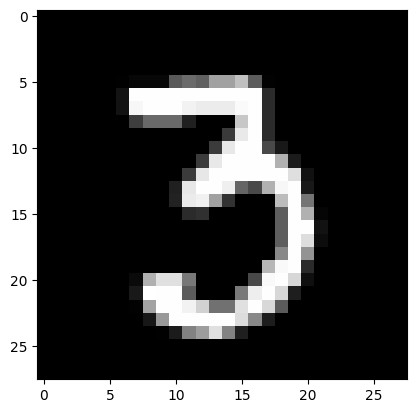

In [64]:
img,res = next(iter(train_data))
prob = net.forward(img[0].view(-1, 28 * 28))
print('prob:',torch.argmax(prob).item(),'res:',res[0].item())
plt.imshow(img[0][0],cmap='gray')
plt.show()

In [114]:
# import math
#
# prob = torch.arange(0.01,1.01,0.01)
# res = torch.ones([100,100])
# temp =0
# for i in range(100):
#     for j in range(100):
#         res[i,j] = prob[i]*math.log(prob[i]/prob[j])
#         temp+=res[i,j]
# res /= (temp/100_00)
# plt.imshow(res,cmap='gray')
# plt.show()